In [2]:
import pandas as pd
df=pd.read_csv("Sales.csv")
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000


In [3]:
print("Dataset Shape :",df.shape)

Dataset Shape : (3114, 12)


In [4]:
print("Columns: \n",df.columns.tolist())

Columns: 
 ['Brands', 'Models', 'Colors', 'Memory', 'Storage', 'Camera', 'Rating', 'Selling Price', 'Original Price', 'Mobile', 'Discount', 'discount percentage']


In [5]:
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [6]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64


In [7]:
#RAM options are categorical (e.g., "4 GB", "6 GB"), and products often follow popular configurations. 
# Imputing with the mode avoids introducing bias or invalid values.
df['Memory'].fillna(df['Memory'].mode()[0],inplace=True)

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_640\4158018307.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Memory'].fillna(df['Memory'].mode()[0],inplace=True)


In [8]:
#Similar to RAM, this is categorical. Using the most common internal storage size maintains dataset integrity.
df['Storage'].fillna(df['Storage'].mode()[0],inplace=True)

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_640\3589390388.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Storage'].fillna(df['Storage'].mode()[0],inplace=True)


In [9]:
#Rating (144 missing) 
#Best Strategy: Fill with mean or median
#Mean is fine if distribution is normal (symmetric).
#Median is safer if distribution is skewed (many high or low ratings).
print(df['Rating'].skew())
#Skewness describes the asymmetry of a distribution (how the data is spread).

-1.2961994956067846


In [10]:
#📍 If skewness is close to 0 → use mean
#📍 If skewed (e.g., > ±1) → use median
df['Rating'].fillna(df['Rating'].median(), inplace=True)


C:\Users\Abhinav\AppData\Local\Temp\ipykernel_640\2995000534.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)


In [11]:
print("Missing values",df.isnull().sum())

Missing values Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64


In [12]:
print("\n Summary statistics:\n",df.describe())


 Summary statistics:
             Rating  Selling Price  Original Price      Discount  \
count  3114.000000    3114.000000     3114.000000   3114.000000   
mean      4.245729   26436.625562    28333.473025   1896.847463   
std       0.265894   30066.892622    31525.599889   5337.126176   
min       2.300000    1000.000000     1000.000000  -8000.000000   
25%       4.100000    9990.000000    10030.250000      0.000000   
50%       4.300000   15000.000000    16889.500000      0.000000   
75%       4.400000   28999.000000    31500.000000   2000.000000   
max       5.000000  179900.000000   189999.000000  75000.000000   

       discount percentage  
count          3114.000000  
mean              6.086788  
std              11.106776  
min            -160.320641  
25%               0.000000  
50%               0.000000  
75%               9.836388  
max              70.610305  


In [22]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [25]:


# Remove outliers from specified columns
for col in ['Selling Price', 'Original Price', 'Discount', 'discount percentage']:
    df = remove_outliers_iqr(clean_df, col)

print("Original dataset shape:", df.shape)


Original dataset shape: (2023, 12)


In [26]:
print("\n Summary statistics:\n",df.describe())


 Summary statistics:
             Rating  Selling Price  Original Price     Discount  \
count  2023.000000    2023.000000     2023.000000  2023.000000   
mean      4.178695   14891.283243    15221.484923   330.201681   
std       0.259776    8937.712633     9216.914980   754.087400   
min       2.300000    1000.000000     1000.000000     0.000000   
25%       4.000000    8499.000000     8537.000000     0.000000   
50%       4.300000   12999.000000    12999.000000     0.000000   
75%       4.300000   19414.500000    19990.000000     0.000000   
max       5.000000   42021.000000    42021.000000  4050.000000   

       discount percentage  
count          2023.000000  
mean              1.705163  
std               3.513801  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max              12.823600  


In [27]:
#Check for duplicates
df.duplicated().sum()

np.int64(49)

In [28]:
#Top brands by number of models
df['Brands'].value_counts()

Brands
SAMSUNG         520
realme          246
Nokia           183
OPPO            169
Xiaomi          168
Lenovo          112
GIONEE          110
ASUS             97
Infinix          96
vivo             80
LG               72
Motorola         58
HTC              41
Apple            33
POCO             27
Google Pixel      7
IQOO              4
Name: count, dtype: int64

In [29]:
#Average rating and price per brand
df.groupby('Brands')[['Rating', 'Selling Price']].mean()


,Rating,Selling Price
Brands,,
ASUS,4.037113,13114.402062
Apple,4.478788,36237.333333
GIONEE,3.862727,7389.027273
Google Pixel,4.414286,31338.142857
HTC,3.839024,18548.560976
IQOO,4.400000,36490.000000
Infinix,4.263542,11042.437500
LG,3.954167,16642.722222
Lenovo,3.986607,10317.383929


In [30]:
#Most discounted phones
df.sort_values(by=['discount percentage'],ascending=False).head(10)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
1625,SAMSUNG,Guru FM Plus SM-B110E/D,Black,4 GB,2 MB,Yes,4.3,1448,1661,SAMSUNG Guru FM Plus SM-B110E/D,213,12.823600
2960,SAMSUNG,Galaxy A22,Mint,6 GB,128 GB,Yes,4.3,16999,19499,SAMSUNG Galaxy A22,2500,12.821170
2942,Nokia,Asha 311,Dark Grey,512 MB,140 MB,Yes,4.0,5999,6879,Nokia Asha 311,880,12.792557
1022,SAMSUNG,M52 5G,Blazing Black,8 GB,128 GB,Yes,4.3,27839,31889,SAMSUNG M52 5G,4050,12.700304
2567,Xiaomi,Mi 11X,LUNAR WHITE,8 GB,128 GB,Yes,4.2,27950,31983,Xiaomi Mi 11X,4033,12.609824
73,Xiaomi,MI 11X 5G,COSMIC BLACK,6 GB,128 GB,Yes,4.1,24492,27995,Xiaomi MI 11X 5G,3503,12.512949
2613,OPPO,A12,Flowing Silver,4 GB,64 GB,Yes,4.4,10490,11990,OPPO A12,1500,12.510425
174,OPPO,A12,Blue,4 GB,64 GB,Yes,4.4,10490,11990,OPPO A12,1500,12.510425
1991,OPPO,A12,Deep Blue,4 GB,64 GB,Yes,4.4,10490,11990,OPPO A12,1500,12.510425
1912,OPPO,A16,CRYSTAL BLACK,4 GB,64 GB,Yes,4.3,13990,15990,OPPO A16,2000,12.507817


In [31]:
brand_profit=df.groupby('Brands')['Discount'].sum().sort_values(ascending=False)
brand_profit.head()

Brands
realme     252980
SAMSUNG    179001
OPPO        73761
Xiaomi      62989
POCO        29500
Name: Discount, dtype: int64

In [32]:
import numpy as np

# Convert to NumPy array
selling_prices = df['Selling Price'].to_numpy()

# Mean
mean_price = np.mean(selling_prices)
print("Mean Selling Price:", mean_price)

# Median
median_price = np.median(selling_prices)
print("Median Selling Price:", median_price)

# Standard Deviation
std_dev_price = np.std(selling_prices)
print("Standard Deviation of Selling Prices:", std_dev_price)

max_price = np.max(selling_prices)
min_price = np.min(selling_prices)
range_price = np.ptp(selling_prices)

print("Maximum Selling Price:", max_price)
print("Minimum Selling Price:", min_price)
print("Range of Selling Prices:", range_price)

Mean Selling Price: 14891.283242708849
Median Selling Price: 12999.0
Standard Deviation of Selling Prices: 8935.503335845417
Maximum Selling Price: 42021
Minimum Selling Price: 1000
Range of Selling Prices: 41021


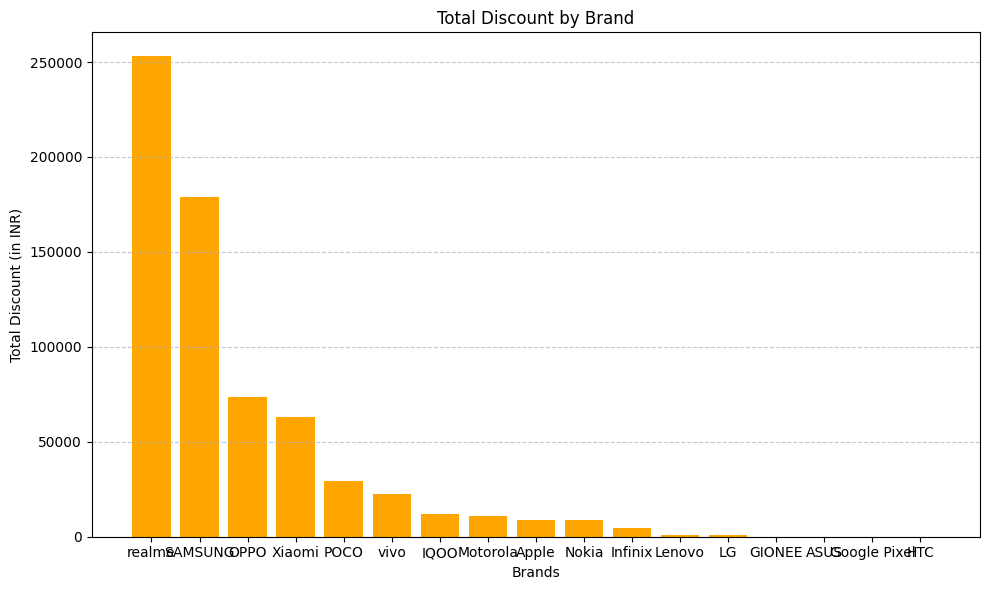

In [33]:
import matplotlib.pyplot as plt

# Group by 'Brands' and sum the 'Discount' for each brand, then sort in descending order
brand_discount = df.groupby('Brands')['Discount'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))                      
plt.bar(brand_discount.index, brand_discount.values, color='orange')  
plt.title('Total Discount by Brand')              
plt.xlabel('Brands')                             
plt.ylabel('Total Discount (in INR)')            
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()                                

# Show the chart
plt.show()

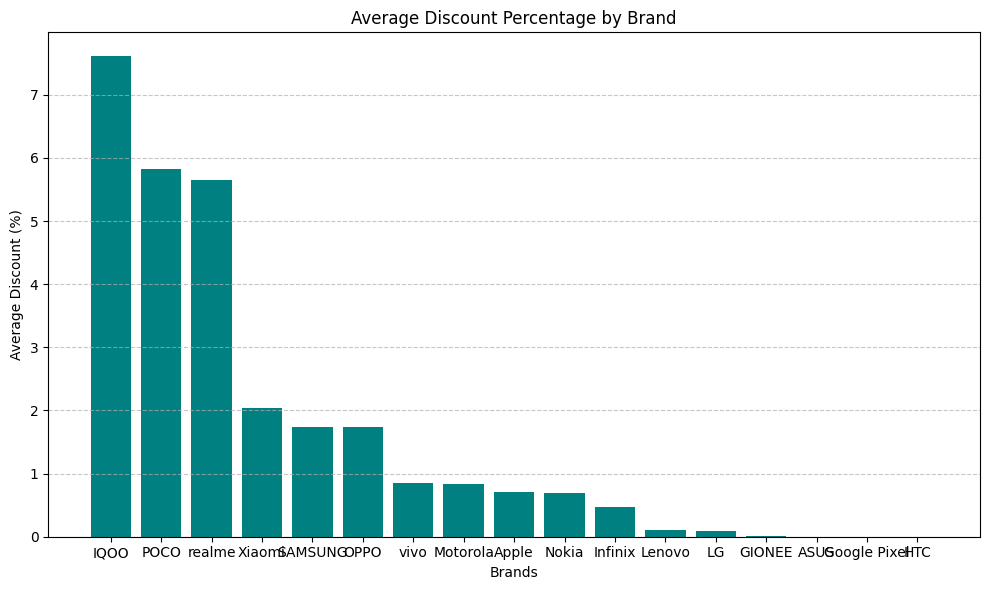

In [34]:
avg_discount_pct = df.groupby('Brands')['discount percentage'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(avg_discount_pct.index, avg_discount_pct.values, color='teal')
plt.title('Average Discount Percentage by Brand')
plt.xlabel('Brands')
plt.ylabel('Average Discount (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

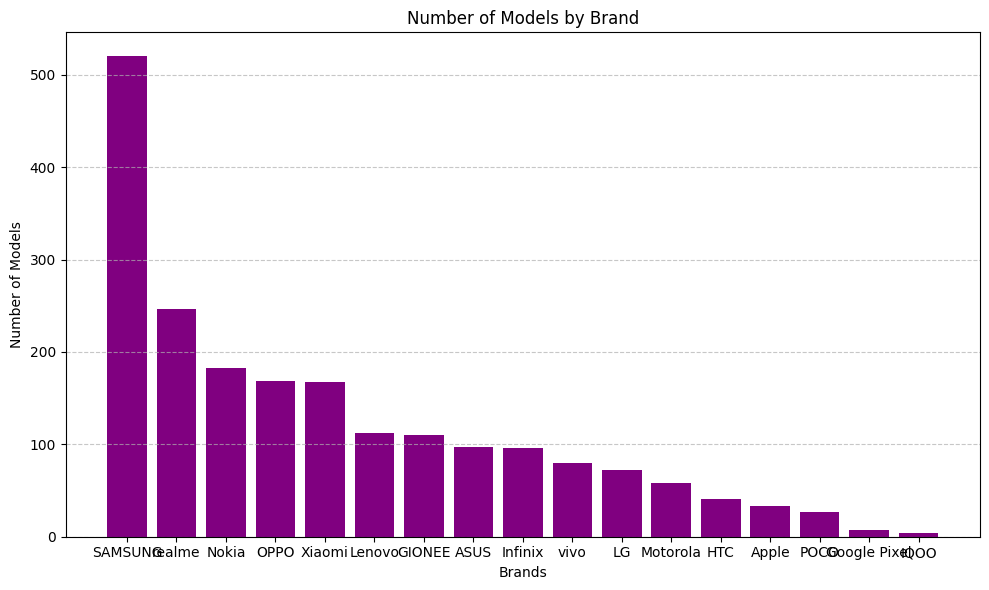

In [35]:
model_count = df['Brands'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(model_count.index, model_count.values, color='purple')  
plt.title('Number of Models by Brand')
plt.xlabel('Brands')
plt.ylabel('Number of Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()